# Neural Networks

Lecture 2.

In [1]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

# Silence warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14

## Ingredients for backpropagation

In [2]:
class Multiply:
    def forward(self, x, y):
        self.x = x
        self.y = y
        return x * y
    
    def backward(self, dLdz):
        dzdx = self.y
        dLdx = dLdz * dzdx
        
        dzdy = self.x
        dLdy = dLdz * dzdy
        return [dLdx, dLdy]


class Add:
    def forward(self, x, y):
        self.x = x
        self.y = y
        return x + y
        
    def backward(self, dLdz):
        dzdy = 1
        dzdx = 1
        return [dLdz * dzdy, dLdz * dzdx]

In [3]:
def f_with_gradients(x, y, z):
    q = Add()
    f = Multiply()
    
    q_out = q.forward(x, y)
    f_out = f.forward(q_out, z)
    
    grad_f = f.backward(1.)
    grad_q = q.backward(grad_f[0])

    gradients = [grad_q[0], grad_q[1], grad_f[1]]
    return f_out, gradients

In [4]:
f_with_gradients(-2, 5, -4)

(-12, [-4.0, -4.0, 3.0])

We can now zoom out, make a "`f` module", that contains some differentiable magic on the inside and stop caring how it works:

In [5]:
class F:
    def forward(self, x, y, z):
        self.q = Add()
        self.f = Multiply()
        
        self.q_out = self.q.forward(x, y)
        self.f_out = self.f.forward(self.q_out, z)
        return self.f_out
    
    def backward(self, dfdz):
        grad_f = self.f.backward(dfdz)
        grad_q = self.q.backward(grad_f[0])
        
        return [grad_q[0], grad_q[1], grad_f[1]]

In [6]:
f = F()
print('f(x, y, z) = ', f.forward(-2, 5, -4))

print('[df/dx, df/dy, df,dz] = ', f.backward(1))

f(x, y, z) =  -12
[df/dx, df/dy, df,dz] =  [-4, -4, 3]


---

## Neural networks in scikit-learn

scikit-learn contains a simple neural network implementation. It is not meant to serve the needs of deep learning, but works well for small problems and is easy to use.

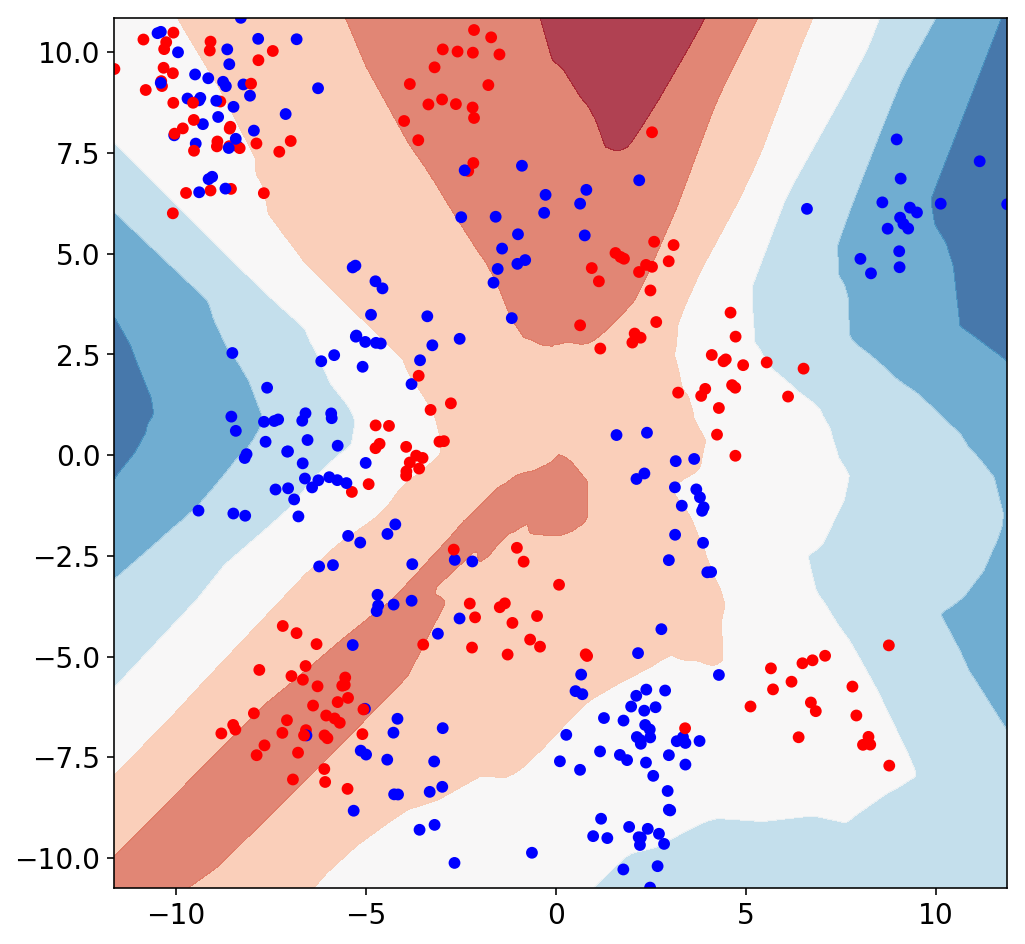

In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_blobs

from utils import plot_surface

labels = ["b", "r"]
X, y = make_blobs(n_samples=400, centers=23, random_state=42)
y = np.take(labels, (y < 10))

clf = MLPClassifier(hidden_layer_sizes=(40, 40, 20), early_stopping=True,
                    validation_fraction=0.2,
                    activation='relu')

clf.fit(X, y)

plot_surface(clf, X, y)

In [ ]:
clf.